# <div style="text-align: center; color: cyan">Fine-tuning</div>

## <div style="text-align: center; color: lime">Setup</div>

In [1]:
import os

if os.getenv("COLAB_RELEASE_TAG"):
    !git clone https://github.com/LiterallyTheOne/Pytorch_Tutorial.git

    %cd src / 10_fine_tuning


## <div style="text-align: center; color: lime">Imports</div>

In [2]:
from pathlib import Path
import kagglehub

import torch
from torch import nn
from torch.utils.data import DataLoader, random_split

from torchvision.transforms import transforms
from torchvision.datasets import ImageFolder
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights

from matplotlib import pyplot as plt

## <div style="text-align: center; color: lime">Load a dataset from Kaggle</div>

In [3]:
path = kagglehub.dataset_download("balabaskar/tom-and-jerry-image-classification")
path = Path(path) / "tom_and_jerry/tom_and_jerry"

tom_and_jerry_transforms = transforms.Compose([transforms.Resize([90, 160]), transforms.ToTensor()])

all_data = ImageFolder(path, transform=tom_and_jerry_transforms)

g1 = torch.Generator().manual_seed(20)
train_data, val_data, test_data = random_split(all_data, [0.7, 0.2, 0.1], g1)

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

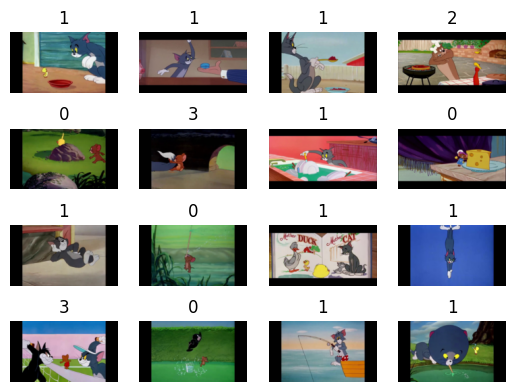

In [4]:
images, labels = next(iter(train_loader))

fig, axes = plt.subplots(4, 4)

axes_ravel = axes.ravel()

for i, (image, label) in enumerate(zip(images, labels)):
    axes_ravel[i].imshow(transforms.ToPILImage()(image))
    axes_ravel[i].set_title(label.item())
    axes_ravel[i].set_axis_off()

## <div style="text-align: center; color: lime">Load pretrained a pretrained model</div>

In [14]:
model = mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)
print(model)

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

## <div style="text-align: center; color: lime">Transfer Learning</div>

In [15]:
# -------------------[ Freeze the model weights ]-------------------
for param in model.parameters():
    param.requires_grad = False

In [16]:
print("classifier before the change:")
print(model.classifier)
print("-" * 20)
# -------------------[ Change the classifier layer ]-------------------
model.classifier = nn.Linear(in_features=1280, out_features=4)

print("classifier after the change:")
print(model.classifier)

classifier before the change:
Sequential(
  (0): Dropout(p=0.2, inplace=False)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)
--------------------
classifier after the change:
Linear(in_features=1280, out_features=4, bias=True)


In [20]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name} {param.shape}")

classifier.weight torch.Size([4, 1280])
classifier.bias torch.Size([4])


In [21]:
%run transfer_learning.py

mps
--------------------
epoch: 0
train: 
	loss: 1.0954
	accuracy: 0.5392
validation: 
	loss: 0.8844
	accuracy: 0.6496
--------------------
epoch: 1
train: 
	loss: 0.9174
	accuracy: 0.6240
validation: 
	loss: 0.8476
	accuracy: 0.6551
--------------------
epoch: 2
train: 
	loss: 0.8672
	accuracy: 0.6508
validation: 
	loss: 0.8195
	accuracy: 0.6615
--------------------
epoch: 3
train: 
	loss: 0.8266
	accuracy: 0.6688
validation: 
	loss: 0.7904
	accuracy: 0.6706
--------------------
epoch: 4
train: 
	loss: 0.8054
	accuracy: 0.6728
validation: 
	loss: 0.7654
	accuracy: 0.6861
--------------------
epoch: 5
train: 
	loss: 0.7903
	accuracy: 0.6879
validation: 
	loss: 0.7560
	accuracy: 0.6962
--------------------
epoch: 6
train: 
	loss: 0.7765
	accuracy: 0.6949
validation: 
	loss: 0.7377
	accuracy: 0.7089
--------------------
epoch: 7
train: 
	loss: 0.7456
	accuracy: 0.7025
validation: 
	loss: 0.7089
	accuracy: 0.7208
--------------------
epoch: 8
train: 
	loss: 0.7255
	accuracy: 0.7056
valida

## <div style="text-align: center; color: lime">Fine-tuning</div>

In [24]:
model = mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)

# -------------------[ Freeze the model weights ]-------------------
for name, param in model.named_parameters():
    if not ("18" in name or "17" in name):
        param.requires_grad = False

In [29]:
model.classifier = nn.Linear(in_features=1280, out_features=4)

for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name} {param.shape}")

features.17.conv.0.0.weight torch.Size([960, 160, 1, 1])
features.17.conv.0.1.weight torch.Size([960])
features.17.conv.0.1.bias torch.Size([960])
features.17.conv.1.0.weight torch.Size([960, 1, 3, 3])
features.17.conv.1.1.weight torch.Size([960])
features.17.conv.1.1.bias torch.Size([960])
features.17.conv.2.weight torch.Size([320, 960, 1, 1])
features.17.conv.3.weight torch.Size([320])
features.17.conv.3.bias torch.Size([320])
features.18.0.weight torch.Size([1280, 320, 1, 1])
features.18.1.weight torch.Size([1280])
features.18.1.bias torch.Size([1280])
classifier.weight torch.Size([4, 1280])
classifier.bias torch.Size([4])


In [28]:
%run fine_tuning.py

mps
--------------------
epoch: 0
train: 
	loss: 0.9683
	accuracy: 0.6188
validation: 
	loss: 0.7647
	accuracy: 0.6870
--------------------
epoch: 1
train: 
	loss: 0.6625
	accuracy: 0.7458
validation: 
	loss: 0.5958
	accuracy: 0.7737
--------------------
epoch: 2
train: 
	loss: 0.5254
	accuracy: 0.8044
validation: 
	loss: 0.5552
	accuracy: 0.7938
--------------------
epoch: 3
train: 
	loss: 0.4250
	accuracy: 0.8422
validation: 
	loss: 0.5924
	accuracy: 0.8002
--------------------
epoch: 4
train: 
	loss: 0.3887
	accuracy: 0.8621
validation: 
	loss: 0.5011
	accuracy: 0.8248
--------------------
epoch: 5
train: 
	loss: 0.3164
	accuracy: 0.8840
validation: 
	loss: 0.6641
	accuracy: 0.7993
--------------------
epoch: 6
train: 
	loss: 0.2683
	accuracy: 0.8986
validation: 
	loss: 0.5314
	accuracy: 0.8312
--------------------
epoch: 7
train: 
	loss: 0.2657
	accuracy: 0.9038
validation: 
	loss: 0.5106
	accuracy: 0.8385
--------------------
epoch: 8
train: 
	loss: 0.2262
	accuracy: 0.9168
valida

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=runs

<div style="text-align: center">

<div>
    @LiterallyTheOne — PhD Candidate in Artificial Intelligence
</div>

<a style="margin: 1em" href="https://literallytheone.github.io">
https://literallytheone.github.io
</a>

</div>
